# TP 1
## Parte 2 - Color

3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando máscaras, las regiones en imágenes
separadas.

In [1]:
import cv2 as cv
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)


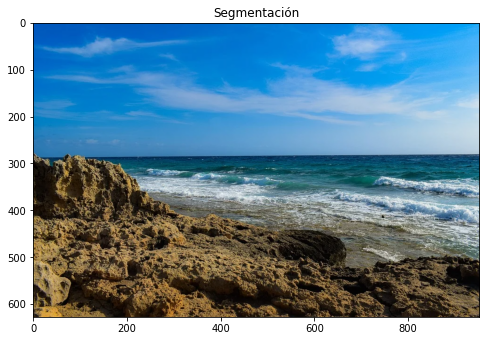

(628, 953, 3)

In [2]:
img = cv.imread('images/segmentacion.png')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=[8, 8])
plt.imshow(img_rgb); plt.title('Segmentación')
plt.show()

img.shape

Vamos a construir un perfil de dos columnas diferentes en el espacio RGB

In [3]:
def plot_img(img, idx_col=0, labels=('R','G','B')):
    # Plotea el perfil de la columna idx_col de la imagen dada
    plt.figure(figsize=[25,5])
    perfil_color = img[:,idx_col]
    plt.plot(perfil_color[:,0], color='r',label=labels[0])
    plt.plot(perfil_color[:,1], color='g',label=labels[1])
    plt.plot(perfil_color[:,2], color='b',label=labels[2])
    plt.xlabel('Fila'); plt.ylabel('Valor'); plt.title('Perfil sobre la columna {}'.format(idx_col))
    plt.grid(); plt.xlim(0,img.shape[0]); plt.ylim(0,255); plt.legend();
    plt.show()

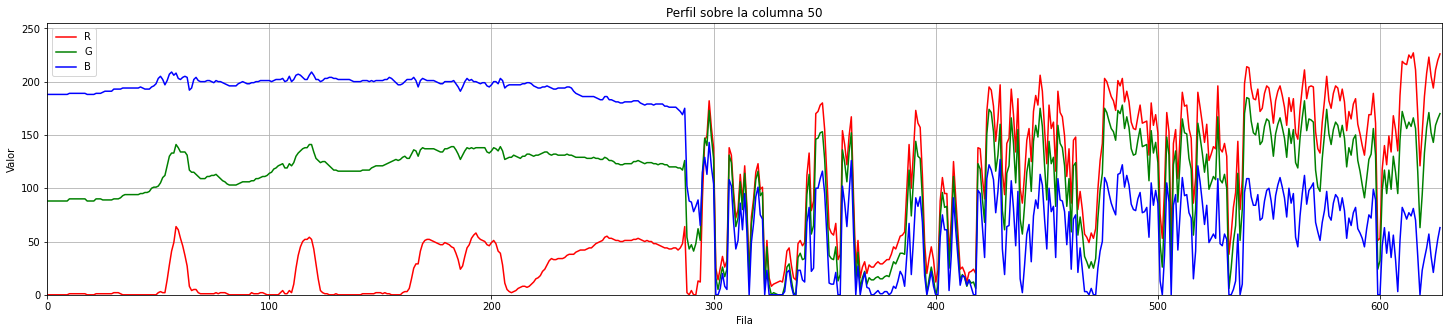

In [4]:
plot_img(img_rgb, 50)

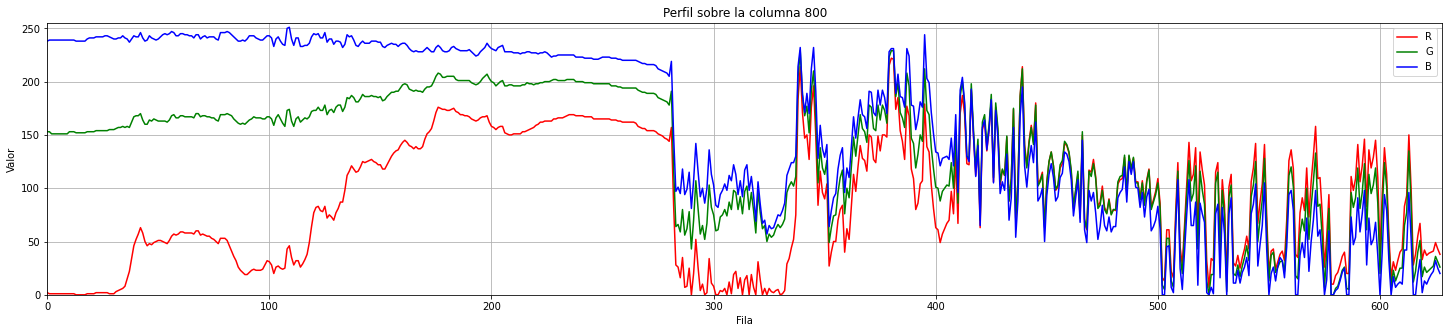

In [5]:
plot_img(img_rgb, 800)

### Sirven los canales RGB para segmentar los elementos de la imagen?
- En el primer perfil - columna 50 - el cielo se puede identificar fácilmente por tener los colores distribuidos en forma uniforme: el rojo en valores cercanos a cero, el verde alrededo del 100, y el azul alrededor de 200. Sin embargo, al construir el perfil de la columna 800, donde el cielo es mucho más claro, solo el azul se mantiene en valores altos. No hay un patrón fácil de identificar en los otros dos canales.

- Por otro lado, en este espacio de colores no es fácil distinguir agua de roca. Vemos además que las olas tienen valores muy altos en los tres canales, pudiéndose confundir con el cielo.

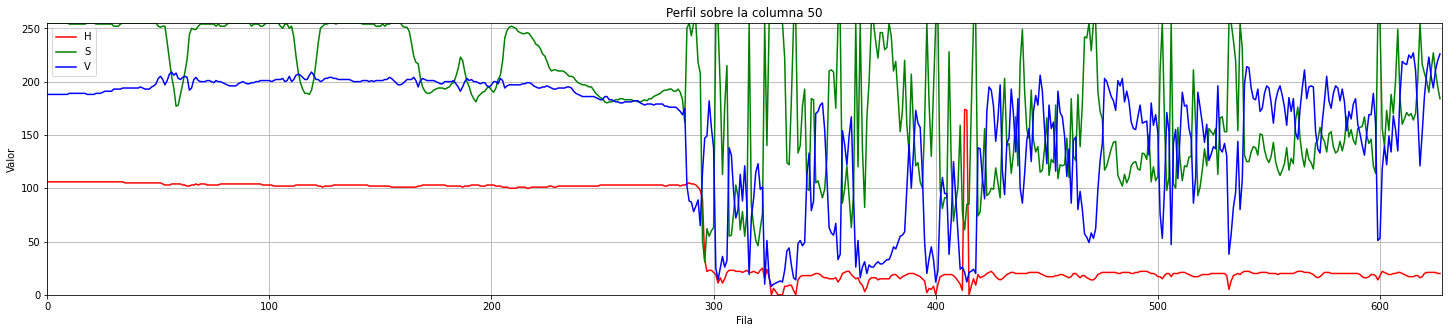

In [6]:
# Vamos a examinar otro espacio de color más conveniente: HSV

img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plot_img(img_hsv, 50, labels=('H','S','V'))

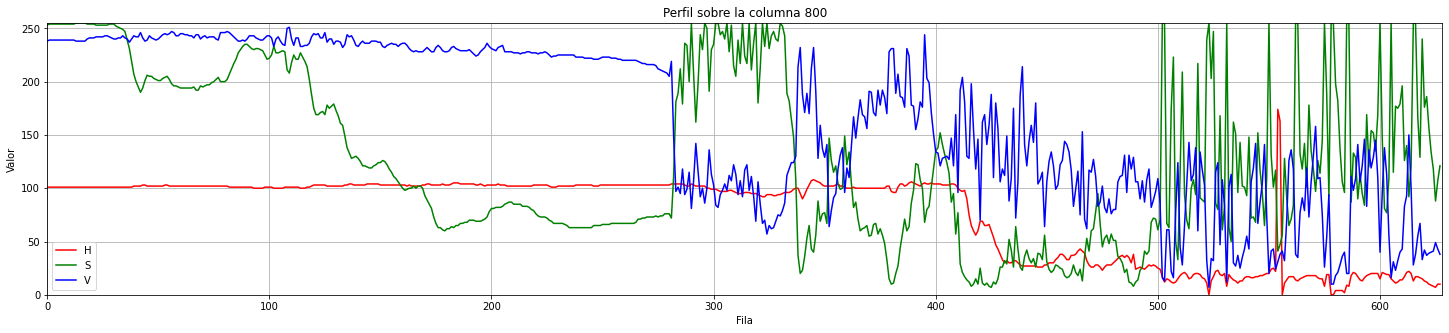

In [7]:
plot_img(img_hsv, 800, labels=('H','S','V'))

### Qué información nos aportan los canales HSV?
- El cielo se caracteriza por su alto brillo (value mayor que 200), el tono alrededor de 100. La saturación depende del área de la imagen, ya que tenemos partes del cielo muy claras y otras muy oscuras.
- La roca si diferencia del resto por su canal H con valores muy bajos.
- El agua tiene valores de hue similares al cielo. Lo que lo diferencia son los otros canales. Hay dos patrones distintos. Saturación alta y brillo bajo (el agua calma), o saturación baja y brillo alto (las olas). En el caso de las olas es posible confundirlas con el cielo.

Vamos a tomar muestras de los distintos elementos - roca, agua y cielo - para ver en detalle estos valores y ver si se pueden segmentar.

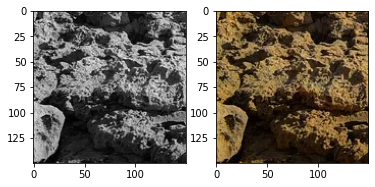

In [8]:
# Tomamos una muestra de la roca
muestra_roca = img_hsv[450:600,50:200,:]

plt.figure(figsize=[6,6])
muestra = cv.cvtColor(muestra_roca, cv.COLOR_HSV2BGR)
muestra = cv.cvtColor(muestra, cv.COLOR_BGR2GRAY)
plt.subplot(121); plt.imshow(muestra, cmap='gray')

muestra_roca_color = img_rgb[450:600,50:200,:]

plt.subplot(122); plt.imshow(muestra_roca_color)
plt.show()

In [9]:
color_mean_roca, color_std_roca = cv.meanStdDev(muestra_roca)

print(color_mean_roca.flatten().tolist())
print(color_std_roca.flatten().tolist())

[16.645377777777778, 159.06151111111112, 91.20511111111112]
[11.018778858110847, 53.34500325183949, 58.056989018347664]


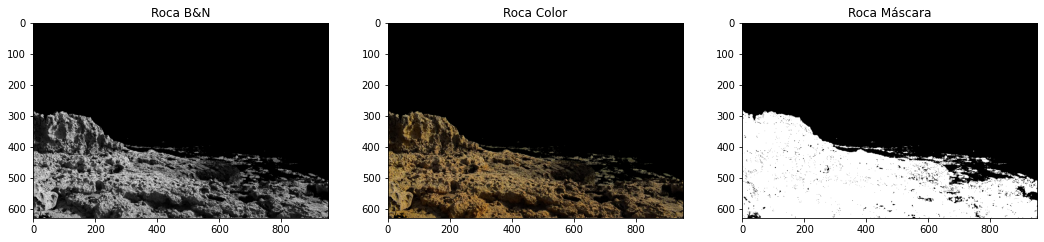

In [10]:
# Construimos una máscara basándonos en los puntos que estén cerca de color_mean en un radio menor que 2 sigmas
# (con 3 sigmas incluye la arena de la playa!)

mask_roca = cv.inRange(img_hsv, color_mean_roca-color_std_roca*2,  color_mean_roca+color_std_roca*2)
img_segmentada = cv.bitwise_and(img_hsv, img_hsv, mask=mask_roca)

plt.figure(figsize=[18,12])

img_segmentada = cv.cvtColor(img_segmentada, cv.COLOR_HSV2BGR)
img_gris = cv.cvtColor(img_segmentada, cv.COLOR_BGR2GRAY)
plt.subplot(131); plt.imshow(img_gris, cmap='gray'); plt.title('Roca B&N')

img_roca_color = cv.cvtColor(img_segmentada, cv.COLOR_BGR2RGB)
plt.subplot(132); plt.imshow(img_roca_color); plt.title('Roca Color')

plt.subplot(133); plt.imshow(mask_roca,cmap='gray'); plt.title('Roca Máscara')
plt.show()

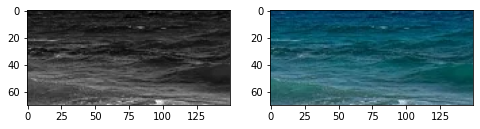

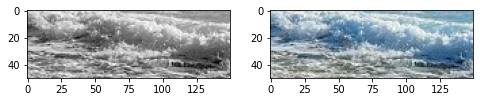

In [11]:
# Tomamos una muestra del agua
muestra_agua = img_hsv[290:360,550:700,:]

plt.figure(figsize=[8,8])
muestra = cv.cvtColor(muestra_agua, cv.COLOR_HSV2BGR)
muestra = cv.cvtColor(muestra, cv.COLOR_BGR2GRAY)
plt.subplot(121); plt.imshow(muestra, cmap='gray')

muestra_agua_color = img_rgb[290:360,550:700,:]

plt.subplot(122);plt.imshow(muestra_agua_color)
plt.show()

# Tomamos una muestra de las olas
muestra_olas = img_hsv[380:430,750:900,:]

plt.figure(figsize=[8,6])
muestra = cv.cvtColor(muestra_olas, cv.COLOR_HSV2BGR)
muestra = cv.cvtColor(muestra, cv.COLOR_BGR2GRAY)
plt.subplot(121); plt.imshow(muestra, cmap='gray')

muestra_olas_color = img_rgb[380:430,750:900,:]

plt.subplot(122); plt.imshow(muestra_olas_color)
plt.show()


In [12]:
color_mean_agua, color_std_agua = cv.meanStdDev(muestra_agua)

print(color_mean_agua.flatten().tolist())
print(color_std_agua.flatten().tolist())

[96.1327619047619, 191.47266666666667, 108.31704761904763]
[2.868862889132816, 54.00308382317351, 20.991267001566744]


In [13]:
color_mean_olas, color_std_olas = cv.meanStdDev(muestra_olas)

print(color_mean_olas.flatten().tolist())
print(color_std_olas.flatten().tolist())

[94.61200000000001, 54.34066666666667, 174.27506666666667]
[16.53870176283491, 43.23880139668793, 40.36010164748786]


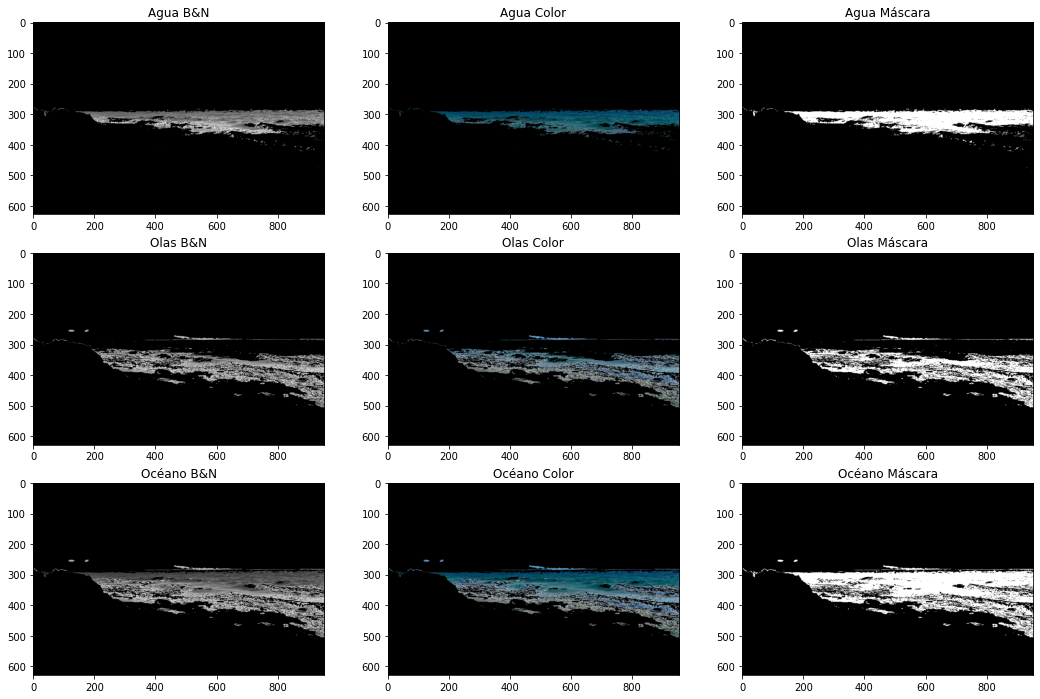

In [14]:
# Definimos el rango HSV para la máscara (en base a los valores observados)

# Construimos dos máscaras, una para el agua calma, otra para las olas.
color_l = (90, 83, 66)
color_u = (102, 255, 150)
mask_agua = cv.inRange(img_hsv, color_l,  color_u)
img_segmentada_agua = cv.bitwise_and(img_hsv, img_hsv, mask=mask_agua)

color_l = (63, 0, 94)
color_u = (131, 140, 200)
mask_olas = cv.inRange(img_hsv, color_l,  color_u)
img_segmentada_olas = cv.bitwise_and(img_hsv, img_hsv, mask=mask_olas)

# Combinamos las máscaras
mask_oceano = mask_agua + mask_olas
img_segmentada_oceano = cv.bitwise_and(img_hsv, img_hsv, mask=mask_oceano)

plt.figure(figsize=[18,12])

# agua
img_segmentada = cv.cvtColor(img_segmentada_agua, cv.COLOR_HSV2BGR)
img_gris = cv.cvtColor(img_segmentada, cv.COLOR_BGR2GRAY)
plt.subplot(331); plt.imshow(img_gris, cmap='gray'); plt.title('Agua B&N')
img_oceano_color = cv.cvtColor(img_segmentada, cv.COLOR_BGR2RGB)
plt.subplot(332); plt.imshow(img_oceano_color); plt.title('Agua Color')
plt.subplot(333); plt.imshow(mask_agua,cmap='gray'); plt.title('Agua Máscara')

# olas
img_segmentada = cv.cvtColor(img_segmentada_olas, cv.COLOR_HSV2BGR)
img_gris = cv.cvtColor(img_segmentada, cv.COLOR_BGR2GRAY)
plt.subplot(334); plt.imshow(img_gris, cmap='gray'); plt.title('Olas B&N')
img_oceano_color = cv.cvtColor(img_segmentada, cv.COLOR_BGR2RGB)
plt.subplot(335); plt.imshow(img_oceano_color); plt.title('Olas Color')
plt.subplot(336); plt.imshow(mask_olas,cmap='gray'); plt.title('Olas Máscara')

# Agua + Olas
img_segmentada = cv.cvtColor(img_segmentada_oceano, cv.COLOR_HSV2BGR)
img_gris = cv.cvtColor(img_segmentada, cv.COLOR_BGR2GRAY)
plt.subplot(337); plt.imshow(img_gris, cmap='gray'); plt.title('Océano B&N')
img_oceano_color = cv.cvtColor(img_segmentada, cv.COLOR_BGR2RGB)
plt.subplot(338); plt.imshow(img_oceano_color); plt.title('Océano Color')
plt.subplot(339); plt.imshow(mask_oceano,cmap='gray'); plt.title('Océano Máscara')
plt.show()



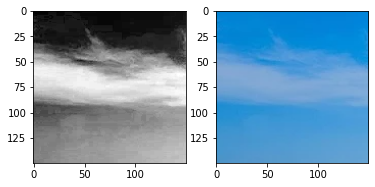

In [15]:
# Tomamos una muestra del cielo

muestra_cielo = img_hsv[100:250,350:500,:]

plt.figure(figsize=[6,6])
muestra = cv.cvtColor(muestra_cielo, cv.COLOR_HSV2BGR)
muestra = cv.cvtColor(muestra, cv.COLOR_BGR2GRAY)
plt.subplot(121); plt.imshow(muestra, cmap='gray')

muestra_cielo_color = img_rgb[100:250,350:500,:]

plt.subplot(122); plt.imshow(muestra_cielo_color)
plt.show()

In [16]:
color_mean_cielo, color_std_cielo = cv.meanStdDev(muestra_cielo)

print(color_mean_cielo.flatten().tolist())
print(color_std_cielo.flatten().tolist())

[102.92026666666668, 178.57600000000002, 213.50062222222223]
[1.4509607299986016, 50.634871181385996, 4.291878590437372]


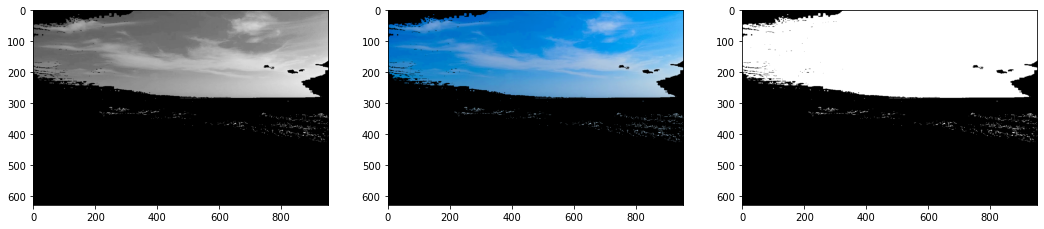

In [17]:
# Definimos el rango HSV para la máscara

# para el color "low" 
color_l = (99, 50, 196)
color_u = (110, 255, 255)

mask_cielo = cv.inRange(img_hsv, color_l,  color_u)

img_segmentada = cv.bitwise_and(img_hsv, img_hsv, mask=mask_cielo)

plt.figure(figsize=[18,12])

img_segmentada = cv.cvtColor(img_segmentada, cv.COLOR_HSV2BGR)
img_gris = cv.cvtColor(img_segmentada, cv.COLOR_BGR2GRAY)
plt.subplot(131); plt.imshow(img_gris, cmap='gray')

img_cielo_color = cv.cvtColor(img_segmentada, cv.COLOR_BGR2RGB)
plt.subplot(132); plt.imshow(img_cielo_color)

plt.subplot(133); plt.imshow(mask_cielo,cmap='gray')
plt.show()

### El cielo no quedó bien :(
- Jugando un poco con los límites se puede segmentar gran parte pero no todo. Ampliando más los rangos, se empieza confundir con el agua.
- Además del solapamiento con los valores de las olas, el cielo tiene dos inconvenientes: por un lado hay valores muy claros de un lado de la foto y muy oscuros del otro, y por otro lado, hay tanto cielo como nubes. Una opción para superar este inconveniente podría ser segmentar celeste y nubes por separado (de la misma forma que hicimos con el agua calma y las olas)

### Resultado de la segmentación

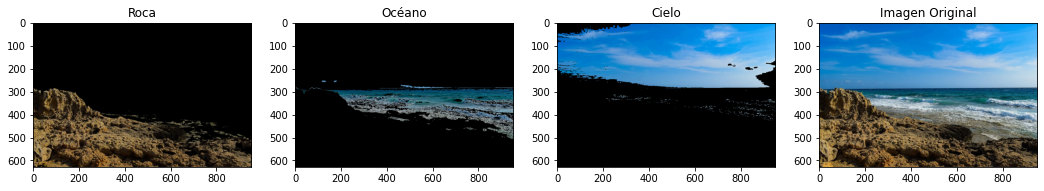

In [18]:
plt.figure(figsize=[18,12])

plt.subplot(141); plt.imshow(img_roca_color); plt.title('Roca')
plt.subplot(142); plt.imshow(img_oceano_color); plt.title('Océano')
plt.subplot(143); plt.imshow(img_cielo_color); plt.title('Cielo')
plt.subplot(144); plt.imshow(img_rgb); plt.title('Imagen Original')
plt.show()